In [2]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [11]:
import json
import gzip

data = []
with gzip.open("/Users/farazjawed/Desktop/Electronics_5.json.gz") as f:
    for i, l in enumerate(f):
        data.append(json.loads(l.strip()))
        # Break after reading the first 100 instances
        if i + 1 == 300000:
            break

# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

300000
{'overall': 5.0, 'vote': '67', 'verified': True, 'reviewTime': '09 18, 1999', 'reviewerID': 'AAP7PPBU72QFM', 'asin': '0151004714', 'style': {'Format:': ' Hardcover'}, 'reviewerName': 'D. C. Carrad', 'reviewText': 'This is the best novel I have read in 2 or 3 years.  It is everything that fiction should be -- beautifully written, engaging, well-plotted and structured.  It has several layers of meanings -- historical, family,  philosophical and more -- and blends them all skillfully and interestingly.  It makes the American grad student/writers\' workshop "my parents were  mean to me and then my professors were mean to me" trivia look  childish and silly by comparison, as they are.\nAnyone who says this is an  adolescent girl\'s coming of age story is trivializing it.  Ignore them.  Read this book if you love literature.\nI was particularly impressed with  this young author\'s grasp of the meaning and texture of the lost world of  French Algeria in the 1950\'s and \'60\'s...partic

In [13]:
# create dataframe from data

df = pd.DataFrame.from_dict(data)

In [14]:
# just keep overall, reviewText, summary, and overall

df = df[["overall", "reviewText", "summary"]]

In [15]:
df["sentiment"] = df["overall"].apply(lambda x: "positive" if x > 2.5 else "negative")

In [16]:
df["sentiment"].value_counts()

sentiment
positive    270689
negative     29311
Name: count, dtype: int64

<Axes: >

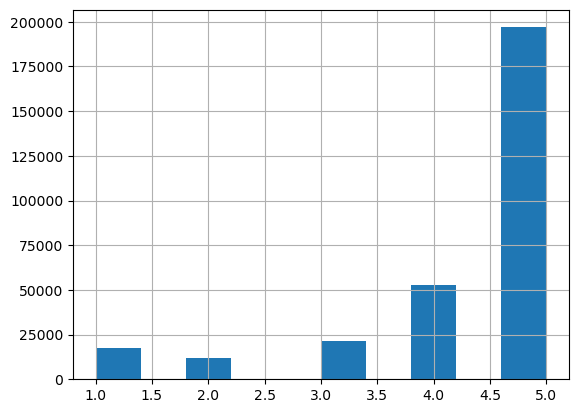

In [17]:
df["overall"].hist()

<Axes: >

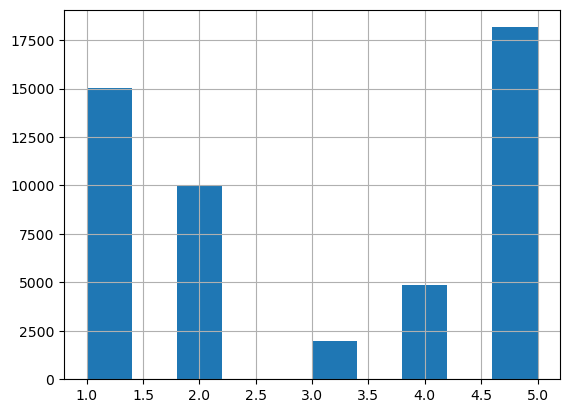

In [18]:
df_positive = df[df["sentiment"] == "positive"].sample(25000)
df_negative = df[df["sentiment"] == "negative"].sample(25000)

# concat both

df = pd.concat([df_positive, df_negative])

# check histogram of overall

df["overall"].hist()

In [19]:
df.to_csv("/Users/farazjawed/Desktop/reviews_sample_stratified.csv")

In [3]:
# read csv file

df = pd.read_csv("reviews_sample_stratified.csv")

df

,Unnamed: 0,overall,reviewText,summary,sentiment
0,99615,5.0,"Nice 1/8"" to RCA stereo adapter. Plug phones ...",Good quality cable,positive
1,262336,5.0,These headphones deliver amazing sound and cla...,Amazing sound and clarity,positive
2,35573,5.0,These are very well made tools that come in a ...,very good deal for the price,positive
3,201016,3.0,Improved our Wi-Fi signal and does what it say...,High end,positive
4,143004,5.0,Installed working.,Five Stars,positive
...,...,...,...,...,...
49995,258089,1.0,This item worked for about a month and a half...,WAS happy...,negative
49996,168870,2.0,fragil and cheap.,Two Stars,negative
49997,131074,2.0,I got this as free item that came along with r...,got only becasue it was free,negative
49998,207362,1.0,This telescope is being sold as a great scope ...,This telescope is being sold as a great scope ...,negative


In [4]:
# preprocessing

# convert to string

df["reviewText"] = df["reviewText"].astype(str)

# df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z#]", "")

df["reviewText"] = df["reviewText"].str.lower()

df["reviewText"] = df["reviewText"].apply(
    lambda x: " ".join([w for w in x.split() if len(w) > 2])
)

df["reviewText"] = df["reviewText"].apply(
    lambda x: " ".join([w for w in x.split() if len(w) < 15])
)

# df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if w.isalpha()]))

# remove punctuation

df["reviewText"] = df["reviewText"].str.replace("[^\w\s]", "")

# remove images

df["reviewText"] = df["reviewText"].str.replace(r"\<img.+\>", "")

# remove links

df["reviewText"] = df["reviewText"].str.replace(r"http\S+", "")

# remove numbers

df["reviewText"] = df["reviewText"].str.replace(r"\d+", "")

# remove stopwords

# from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')

# stop = stopwords.words('english')

# df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [5]:
df["reviewText"] = df["reviewText"].str.replace(".", "")

# remove extra spaces

df["reviewText"] = df["reviewText"].str.replace(" +", " ")

# remove comma

df["reviewText"] = df["reviewText"].str.replace(",", "")

# remove question mark

df["reviewText"] = df["reviewText"].str.replace("?", "")

In [6]:
# save to csv

# remove numbers

df["reviewText"] = df["reviewText"].str.replace(r"\d+", "")

df.to_csv("reviews_sample_stratified_preprocessed.csv", index=False)

In [7]:
# only keep reviewText and overall and summary and sentiment columns

df = df[["reviewText", "overall", "sentiment"]]

df.head(10)

,reviewText,overall,sentiment
0,"nice 1/8"" rca stereo adapter plug phones music...",5.0,positive
1,these headphones deliver amazing sound and cla...,5.0,positive
2,these are very well made tools that come well ...,5.0,positive
3,improved our wi-fi signal and does what says w...,3.0,positive
4,installed working,5.0,positive
5,fits laptop 173 perfectly with room spare room...,5.0,positive
6,how did ever get things done before while the ...,5.0,positive
7,this review the seller only not the product th...,3.0,positive
8,writable makes for much better product for cli...,5.0,positive
9,product arrived good condition and worked perf...,5.0,positive


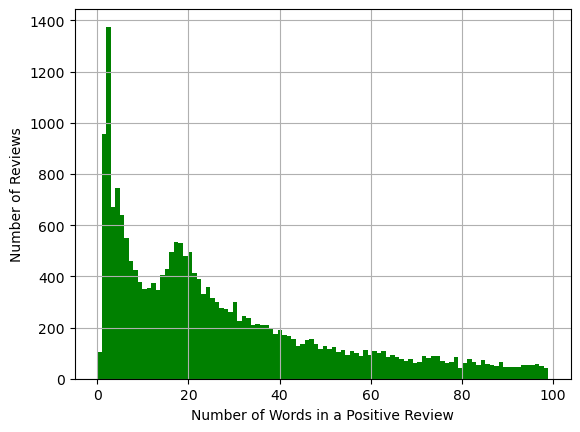

In [8]:
# graph the distribution of the number of words in the reviews

import matplotlib.pyplot as plt

# remove the outliers and graph seperately for positive and negative reviews

# only filter for positive reviews

df_positive = df[df["sentiment"] == "positive"]

df_positive = df_positive[
    df_positive["reviewText"].str.split().map(lambda x: len(x)) < 100
]

df_positive["reviewText"].str.split().map(lambda x: len(x)).hist(
    bins=100, color="green"
)
plt.xlabel("Number of Words in a Positive Review")

plt.ylabel("Number of Reviews")
plt.show()

# add the labels in the graph

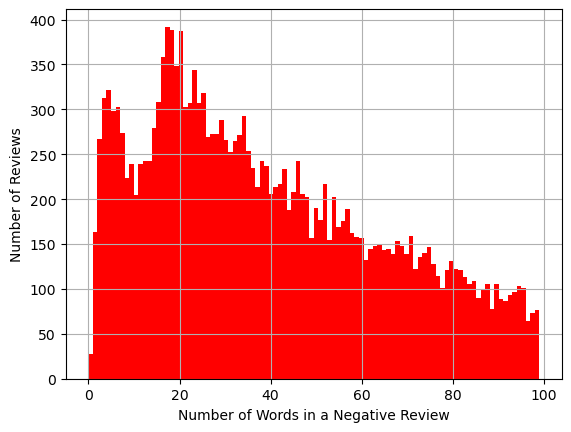

In [9]:
# df negative

df_negative = df[df["sentiment"] == "negative"]

df_negative = df_negative[
    df_negative["reviewText"].str.split().map(lambda x: len(x)) < 100
]

df_negative["reviewText"].str.split().map(lambda x: len(x)).hist(bins=100, color="red")
plt.xlabel("Number of Words in a Negative Review")

plt.ylabel("Number of Reviews")

# add red color to the plot


plt.show()